<a href="https://colab.research.google.com/github/Azevedo1996/Analise-de-dados/blob/main/Analisando_dados_de_supermarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto
Com demandas crescentes e competições acirradas no mercado, a Superstore Giant está buscando seu conhecimento para entender o que funciona melhor para ela. Eles gostariam de entender quais produtos, regiões, categorias e segmentos de clientes eles devem segmentar ou evitar.
______________________________________________________________________
Você pode até dar um passo adiante e tentar construir um modelo de Regressão para prever Vendas ou Lucro.
______________________________________________________________________
Enlouqueça com o conjunto de dados, mas também forneça alguns insights de negócios para melhorar.

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import datetime
import plotly.graph_objs as go
import scipy.stats as sm
import pylab as py

In [2]:
# Lendo e abrindo o dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projeto de estudo/Arquivos CSV utilizados/Sample - Superstore.csv",encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Verificando o tamanho do dataset
df.shape

(9994, 21)

In [4]:
# Visualizando os nomes das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
# Verificando se existem arquivos nulos (NaN) no dataset
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

**Não há nenhum valor ausente, então podemos passar métodos de codificador. (métodos label e onehot)**

In [6]:
# Visualizando as estatisticas do dataset
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# **Analisando e Visualizando os dados**

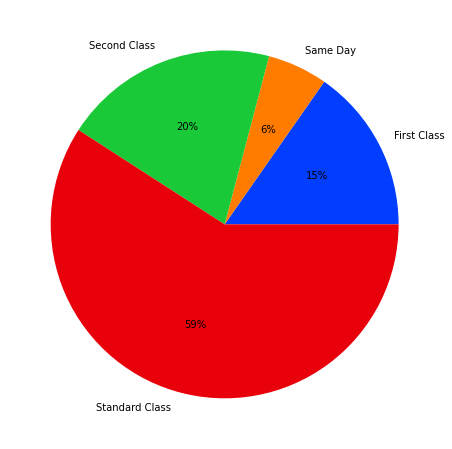

In [7]:
ss = df.loc[:,["Ship Mode","Sales"]]
ss = ss.groupby(by=["Ship Mode"]).sum()
labels = []
for i in ss.index:
    labels.append(i)  
plt.figure(figsize=(8,8))
colors = sns.color_palette('bright')
plt.pie(ss["Sales"],colors = colors,labels=labels, autopct = '%0.0f%%')
plt.show();

Como vemos neste grafico de pizza, a standard class tem melhores vendas do que as outras.

# QUEM COMPROU MAIS PRODUTOS?

In [8]:
df.groupby(by=["Customer ID","Customer Name"]).sum().sort_values(by=["Sales"],ascending=False).iloc[0,:]

Row ID          77545.0000
Postal Code    482091.0000
Sales           25043.0500
Quantity           50.0000
Discount            3.7000
Profit          -1980.7393
Name: (SM-20320, Sean Miller), dtype: float64

Sean Miller comprou mais produtos do que os outros, então ele é o maior comprador

# QUEM COMPROU MENOS PRODUTOS?

In [9]:
df.groupby(by=["Customer ID","Customer Name"]).sum().sort_values(by=["Sales"]).iloc[0,:]

Row ID           3572.0000
Postal Code    117197.0000
Sales               4.8330
Quantity            4.0000
Discount            1.4000
Profit             -3.3156
Name: (TS-21085, Thais Sissman), dtype: float64

Thais Sissman é a que menos compra

QUANTOS PRODUTOS COMPRADOS, E EM QUAIS ESTADOS?

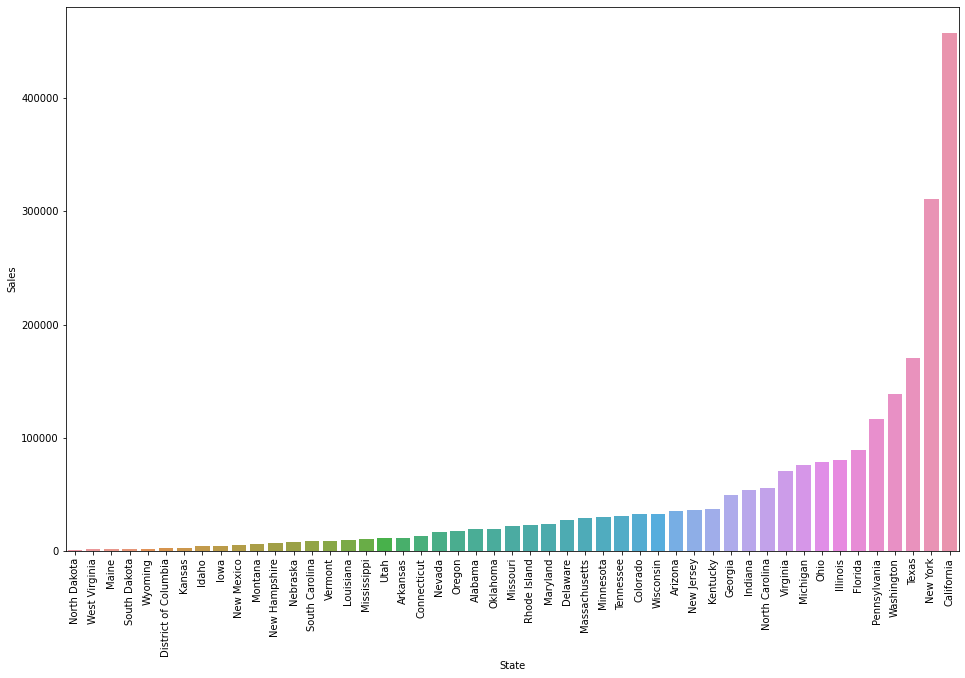

In [10]:
# Plotando o numero de vendas por estados
states = df.loc[:,["State","Sales"]]
states = states.groupby(by=["State"]).sum().sort_values(by="Sales")
plt.figure(figsize=(16,10))
sns.barplot(x=states.index,y=states["Sales"],data=states)
plt.xticks(rotation = 90)
plt.xlabel=("Estados")
plt.ylabel=("Compras")
plt.show();

Vemos atraves do grafico que as pessoas que mais compram são da California, enquanto as que menos compram são de Dakota do Norte.

## **QUAIS OS MAIORES LUCROS DOS ESTADOS?**

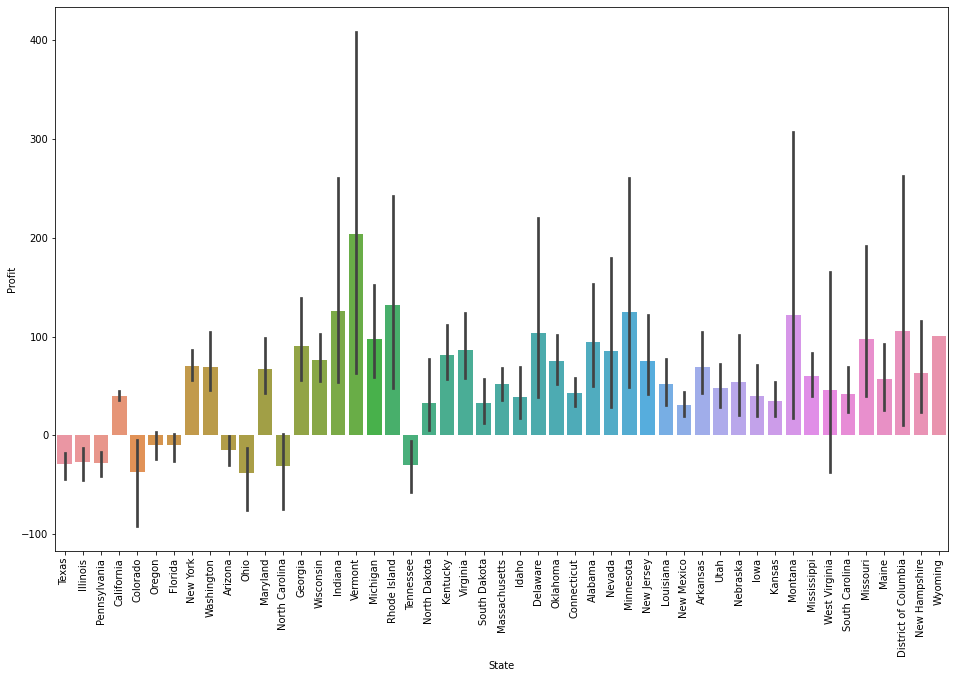

In [11]:
pr = df.groupby(by = ["State","Profit"]).sum().sort_values(by="Sales").reset_index()
plt.figure(figsize=(16,10))
sns.barplot(x = pr.State,y = pr["Profit"],data = states)
plt.xticks(rotation = 90)
plt.xlabel=("Estados")
plt.xlabel=("Lucro")
plt.show()

**Regiões com melhores vendas**

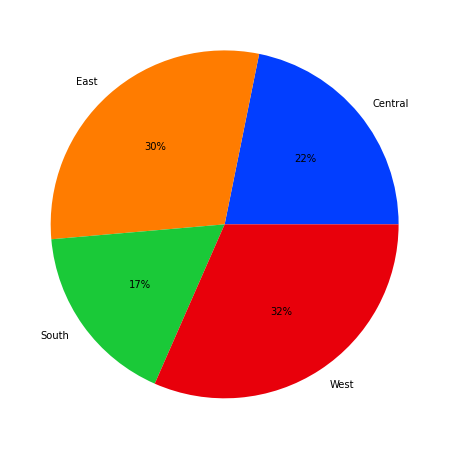

In [12]:
# Porcentagem de vendas por estado.
d = df.groupby(by=["Region"]).sum()
labels=[]
for i in d.index:
    labels.append(i)  
plt.figure(figsize=(8,8))
# colors = sns.color_palette('pastel')
plt.pie(d["Sales"],colors = colors,labels=labels, autopct = '%0.0f%%')
plt.show();

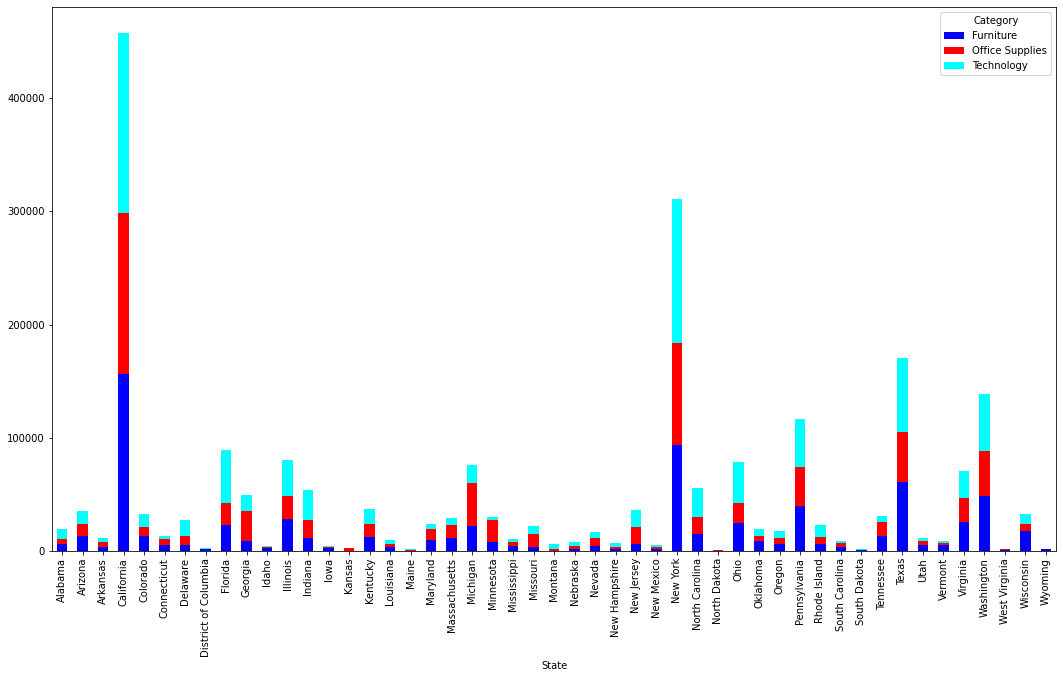

In [13]:
# Categorias de produtos mais vendidas por estado.
pvt = df.groupby(by=["State","Category"]).sum("Sales").reset_index()
pvt = pvt.pivot(index="State", columns='Category', values='Sales').reset_index()
pvt.set_index('State').plot(kind='bar', color=["blue","red","cyan"],figsize=(18,10),stacked=True)
plt.show()

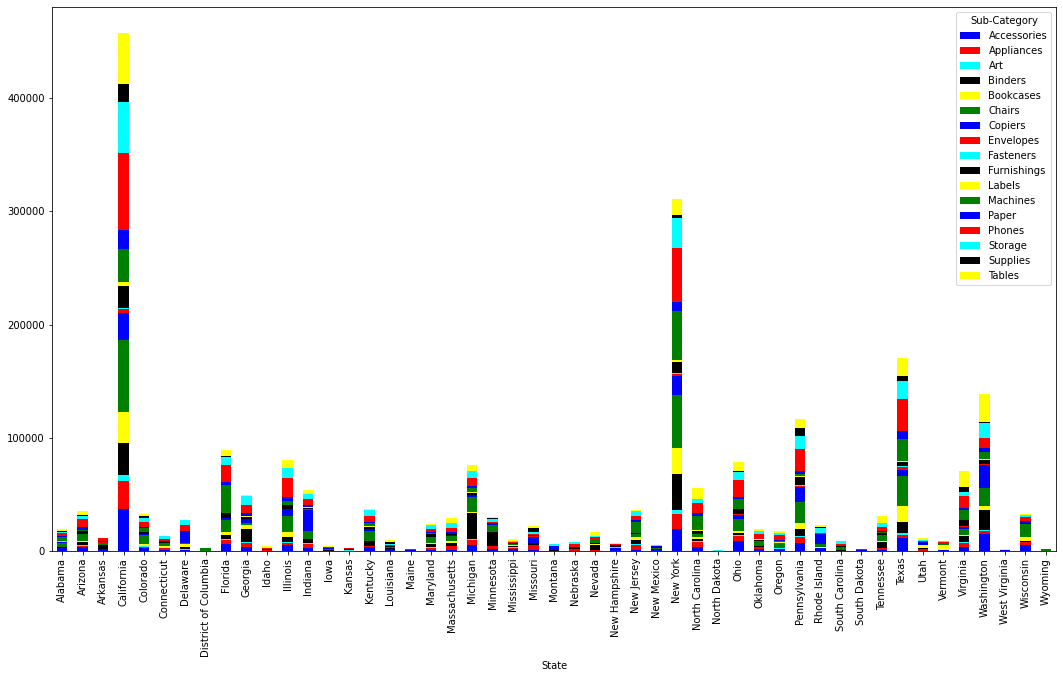

In [14]:
# Sub-categorias de produtos mais vendidas por estado.
pvt = df.groupby(by=["State","Sub-Category"]).sum("Sales").reset_index()
pvt = pvt.pivot(index="State", columns="Sub-Category", values='Sales').reset_index()
pvt.set_index('State').plot(kind='bar', color=["blue","red","cyan","black","yellow","green"],figsize=(18,10),stacked=True)
plt.show();

QUAIS OS MELHORES E OS PIORES PRODUTOS QUE SÃO VENDIDOS?

In [15]:
print("O pior produto vendido é: {}".format(df.groupby(by=["Product Name"]).sum().sort_values(["Sales"]).index[0]).upper())
print("O melhor produto vendido é: {}".format(df.groupby(by=["Product Name"]).sum().sort_values(["Sales"]).index[-1]).upper())

O PIOR PRODUTO VENDIDO É: EUREKA DISPOSABLE BAGS FOR SANITAIRE VIBRA GROOMER I UPRIGHT VAC
O MELHOR PRODUTO VENDIDO É: CANON IMAGECLASS 2200 ADVANCED COPIER


**Vendas por ano**

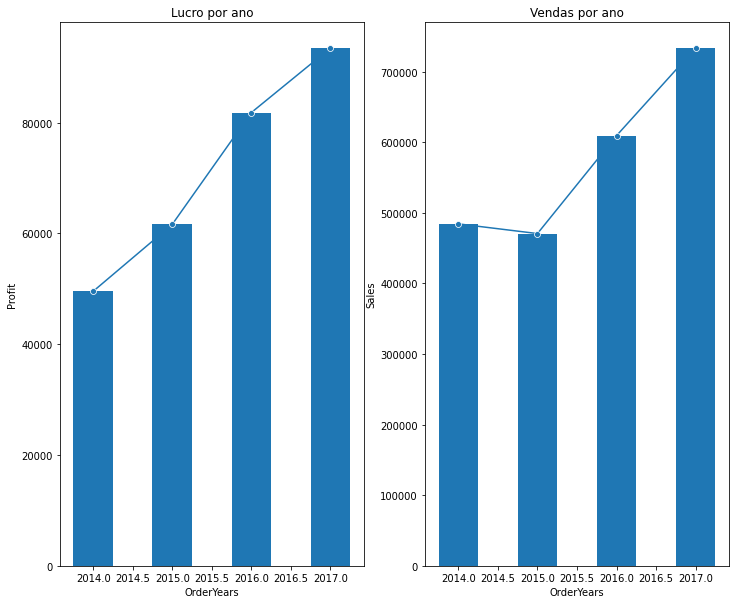

In [16]:
df['PROFITSYears'] = pd.DatetimeIndex(df['Order Date']).year
yd = df.groupby(by=["PROFITSYears"]).sum("Profit").reset_index()
df['OrderYears'] = pd.DatetimeIndex(df['Order Date']).year
yd = df.groupby(by=["OrderYears"]).sum("Sales").reset_index()
plt.figure(figsize=(12,10))
plt.subplot(1, 2, 1)
sns.lineplot(yd["OrderYears"],yd["Profit"],marker='o')
plt.bar(yd["OrderYears"],yd["Profit"],width=0.5)
plt.title("Lucro por ano")
plt.subplot(1, 2, 2)
sns.lineplot(yd["OrderYears"],yd["Sales"],marker='o')
plt.bar(yd["OrderYears"],yd["Sales"],width=0.5)
plt.title("Vendas por ano")

plt.show();

**Distribuição de descontos**

In [17]:
trace = go.Histogram(x=df.Discount, xbins=dict(start=np.min(df.Discount), size=0.05, end=np.max(df.Discount)), marker=dict(color='rgb(100, 0, 100)'))
layout = go.Layout(title="Distribuição de descontos")
fig = go.Figure(data=go.Data([trace]), layout=layout)
fig.show();

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning: plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.

  DeprecationWarning,


**É assimétrico à direita e não contínuo**

**Distribuição de lucros**

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




A distribuição de lucros é normal?


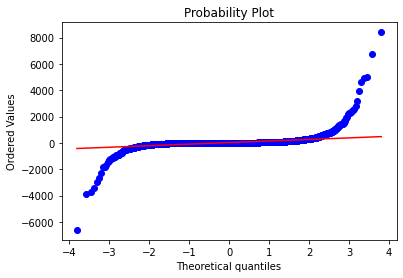

In [18]:
trace = go.Histogram(x=df.Profit, xbins=dict(start=np.min(df.Profit), size=100, end=np.max(df.Profit)), marker=dict(color='rgb(100, 0, 90)'))
layout = go.Layout(title="Profit distribution!")
fig = go.Figure(data=go.Data([trace]), layout=layout)
fig.show();
print("A distribuição de lucros é normal?")
sm.probplot(df.Profit, dist="norm", plot=py)
py.show();

Embora a distribuição de lucros seja em forma de sino e simétrica, não é normal por causa das caudas longas e o gráfico de probabilidade nos mostra.

**Distribuição de quantidade**

In [19]:
trace = go.Histogram(x=df.Quantity, xbins=dict(start=np.min(df.Quantity), size=1, end=np.max(df.Quantity)), marker=dict(color='rgb(110, 0, 50)'))
layout = go.Layout(title="Distribuição de quantidade")
fig = go.Figure(data=go.Data([trace]), layout=layout)
fig.show();

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




Está inclinado para a direita novamente.

Quais são as categorias e subcategorias mais comuns?

In [20]:
def ones(x):
    return 1
df['Row ID'] = df['Row ID'].apply(ones)

In [21]:
fig = px.sunburst(data_frame = df[['Category','Sub-Category','Row ID']].groupby(['Category','Sub-Category']).sum().reset_index(), path=['Category', 'Sub-Category'], values='Row ID', title='Frequência de ocorrências da categoria.',color_discrete_sequence=px.colors.sequential.Electric)
fig.show();

**Eu usei Row ID como um valor para o sunburst, a soma de IDs de linha para cada categoria nos dá a frequência de ocorrência de cada categoria.**

O único valor único da coluna país é Estados Unidos, então, em vez de plotar a frequência da ocorrência dos países, vou plotar a frequência da ocorrência das regiões e cidades.

In [22]:
fig = px.sunburst(data_frame = df[['Region','City','Row ID']].groupby(['Region','City']).sum().reset_index(), path=['Region', 'City'], values='Row ID', title='Frequência de ocorrências de regiões e cidades.',color_discrete_sequence=px.colors.sequential.Mint)
fig.show();

In [23]:
# Principais produtos por frequência
print("Contagem total de produtos: ",len(list(df['Product Name'].unique())))
top_prod = df.groupby('Product Name').size().reset_index().rename(columns={0: 'total'}).sort_values('total', ascending=False).head(5)
fig = px.pie(top_prod, values='total', names='Product Name', color_discrete_sequence=px.colors.sequential.Hot, title='Top 5 produtos.')
fig.show();
top_prod = df.groupby('Product Name').size().reset_index().rename(columns={0: 'total'}).sort_values('total', ascending=False).head(10)
fig = px.pie(top_prod, values='total', names='Product Name', color_discrete_sequence=px.colors.sequential.Hot, title='Top 10 produtos.')
fig.show();
top_prod = df.groupby('Product Name').size().reset_index().rename(columns={0: 'total'}).sort_values('total', ascending=False).head(20)
fig = px.pie(top_prod, values='total', names='Product Name', color_discrete_sequence=px.colors.sequential.Hot, title='Top 20 produtos.')
fig.show();

Contagem total de produtos:  1850


**Principais produtos por categoria**

**Se eu plotar os principais produtos por subcategoria, o gráfico ficará uma bagunça completa, então vou plotar os principais produtos por categoria**

In [24]:
fig = px.sunburst(data_frame = df[['Category','Product Name','Row ID']].groupby(['Category','Product Name']).sum().reset_index().sort_values('Row ID',ascending=False).head(50), path=['Category', 'Product Name'], values='Row ID', title='Os 50 principais produtos e sua distribuição nas categorias',color_discrete_sequence=px.colors.sequential.Agsunset)
fig.show();

Qual segmento é mais comum?

Aposto que o Segmento de Consumo é o mais comum!

In [25]:
segment = df.groupby('Segment').size().reset_index().rename(columns={0: 'total'})
fig = px.pie(segment, values='total', names='Segment', color_discrete_sequence=px.colors.sequential.Cividis, title='Frequência dos segmentos')
fig.show();

Isso aí! Imaginei!

**Diferentes categorias têm as mesmas distribuições de Vendas e Lucro?**

In [26]:
trace = go.Histogram(x=df[df.Category=='Technology'].Profit, xbins=dict(start=np.min(df.Profit), size=100, end=np.max(df.Profit)), marker=dict(color='rgb(100, 0, 90)'),name='Technology')
trace2  = go.Histogram(x=df[df.Category=='Furniture'].Profit, xbins=dict(start=np.min(df.Profit), size=100, end=np.max(df.Profit)), marker=dict(color='rgb(225, 0, 0)'),name='Furniture')
trace3 = go.Histogram(x=df[df.Category=='Office Supplies'].Profit, xbins=dict(start=np.min(df.Profit), size=100, end=np.max(df.Profit)), marker=dict(color='rgb(255, 255, 0)'),name='Office Supplies')
layout = go.Layout(title="Lucro por categoria")
fig = go.Figure(data=go.Data([trace,trace2,trace3]), layout=layout)
fig.show();
print('Produtos de tecnologia significam lucro de',df[df.Category=='Technology'].Profit.mean(),'Produtos de tecnologia lucro medio', df[df.Category=='Technology'].Profit.std(),'Média de lucro de produtos de tecnologia', df[df.Category=='Technology'].Profit.median())
print('Produtos de móveis significam lucro de',df[df.Category=='Furniture'].Profit.mean(),'Lucro de produtos de móveis medio', df[df.Category=='Furniture'].Profit.std(),'Lucro de produtos de móveis mediana', df[df.Category=='Furniture'].Profit.median())
print('Produtos de material de escritório significam lucro de',df[df.Category=='Office Supplies'].Profit.mean(),'Lucro de produtos de material de escritório medio', df[(df.Category=='Office supplies')].dropna().Profit.std(),'Média de lucro dos produtos de material de escritório', df[(df.Category=='Office supplies')].dropna().Profit.median())

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




Produtos de tecnologia significam lucro de 78.75200221981586 Produtos de tecnologia lucro medio 428.81663300517454 Média de lucro de produtos de tecnologia 25.0182
Produtos de móveis significam lucro de 8.699327109853842 Lucro de produtos de móveis medio 136.04924643905227 Lucro de produtos de móveis mediana 7.7748
Produtos de material de escritório significam lucro de 20.327049585131117 Lucro de produtos de material de escritório medio nan Média de lucro dos produtos de material de escritório nan


# **Conclusão**
1) A distribuição das vendas é muito assimétrica à direita: a maioria das vendas está abaixo do valor médio, mas há uma longa história de vendas altas.

2) A distribuição dos descontos é assimétrica à direita e não contínua.

3) A distribuição de lucro é em forma de sino, mas não é normal por causa de seus contos enormemente grandes e muitos valores discrepantes (especialmente no lado direito da distribuição)

4) A distribuição da quantidade é assimétrica à direita, mas não tanto quanto a distribuição das vendas.

5) A categoria mais comum é material de escritório e a menos comum é tecnologia

6) Pastas, Papel, Armazenamento, Arte e Telefones são as subcategorias mais comuns.

7) A região Oeste tem mais clientes e a região Sul tem menos clientes.

8)Nova York, Los Angeles, São Francisco, Filadélfia, Seattle e Houston são as maiores cidades em termos de quantidade de clientes.

9) Envelope de grampos, grampos, papel de grampo fácil, pastas antiaderentes Avery, grampos em misc.colors são os produtos mais populares. (Todo mundo precisa grampear o papel!)

10) Os produtos de alta tecnologia são Maxell 4,7 GB DVD-R, LogiTech Dekstop MK120 Mouse and Keyboard Combo, Kingston Digital DataTraveler, Logitech 910-002974 M325 Wireless Mouse para Web Scrolling

Os principais produtos de escritório são produtos relacionados a grampos

Os principais produtos de móveis são mesa de altura ajustável KL, tapeçarias à base de grampos, cadeiras dobráveis ​​com contornos de situação

11) O segmento de consumo é o segmento mais comum.

12) Os produtos de tecnologia têm a maior média e mediana de distribuição de lucros, mas também apresentam a maior variabilidade.

13) Os produtos de tecnologia têm a maior média de vendas, mas não a maior mediana. Isso é por causa dos outliers.